# Role of Sharpe and Sortino Ratios in Portfolio Construction

When analyzing the inclusion of assets in the **Global Minimum Variance (GMV)** and **Tangency Portfolios**, two key risk-adjusted performance measures are especially helpful: the **Sharpe Ratio** and the **Sortino Ratio**. Both metrics provide insight into how well an asset compensates investors for the risk taken, but they emphasize risk differently.

---

## Sharpe Ratio: Reward per Unit of Total Risk
- **Definition**: Measures excess return (over the risk-free rate) per unit of **total volatility**.  
- **Application in GMV and Tangency Portfolios**:
  - In the **GMV Portfolio**, assets with low volatility and steady returns (often debt instruments) will naturally have higher Sharpe Ratios compared to volatile equities. This supports their heavy allocation in the GMV strategy.  
  - In the **Tangency Portfolio**, the Sharpe Ratio directly determines the slope of the **Capital Market Line (CML)**. Assets with superior Sharpe Ratios (higher excess return per unit of risk) get larger weights, as they maximize overall risk-adjusted returns.  

---

## Sortino Ratio: Reward per Unit of Downside Risk
- **Definition**: Focuses only on **downside volatility** (returns falling below a target or risk-free threshold).  
- **Why it matters**: Unlike the Sharpe Ratio, it doesn’t penalize upside volatility, making it more relevant when distinguishing between assets that are volatile but skew positively (e.g., growth equities).  
- **Application**:
  - In GMV, Sortino helps confirm whether low-volatility assets are also effective at minimizing **downside risk exposure**, not just overall variance.  
  - In the Tangency Portfolio, Sortino highlights assets that may have lower Sharpe Ratios due to upside swings but still deliver strong downside protection—useful for balancing equities with debt.  

---

## Using Individual Asset Ratios to Build Robust Strategies
- **Asset-Level Insight**:  
  - By comparing Sharpe and Sortino ratios across assets, investors can spot which securities provide the best **risk-adjusted contributions** to the portfolio.  
  - Example: A stock with a moderate Sharpe but strong Sortino may offer valuable downside protection, making it attractive in stress-test scenarios.  

- **Strategic Robustness**:  
  - **High Sharpe assets** → Maximize efficiency in the Tangency Portfolio.  
  - **High Sortino assets** → Add resilience against drawdowns, especially useful in GMV or defensive overlays.  
  - Combining both ensures that portfolios are not only **optimized mathematically** but also **practically resilient** across market conditions.  

---

✅ **Summary**:  
- **Sharpe Ratio** ensures assets contribute to maximizing overall efficiency.  
- **Sortino Ratio** highlights which assets protect against downside risk.  
- Together, they guide the inclusion and weighting of assets in GMV and Tangency portfolios, while also informing strategies for making portfolios more **robust across market cycles**.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# User inputs
#tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "JNJ"]  # change as you like
tickers = [
    "RELIANCE.NS",   # Reliance Industries
    "TCS.NS",        # Tata Consultancy Services
    "INFY.NS",       # Infosys
    "HDFCBANK.NS",   # HDFC Bank
    "ICICIBANK.NS",  # ICICI Bank
    "HINDUNILVR.NS", # Hindustan Unilever
    "LT.NS",         # Larsen & Toubro
    "AXISGOLD.NS",   # Axis Gold ETF
    "^GSPC",         # S&P 500 (international diversification)
    "ICICIB22.NS",   # BHARAT 22 ETF
    "EBBETF0430.NS", # The Bharat Bond ETF
    "LTGILTBEES.NS"
]

start_date = "2018-01-01"
end_date = "2024-12-31"  # change to desired end date
risk_free_rate = 0.05  # annual risk-free rate (e.g., 5%)

# 1) Download adjusted close prices
prices = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)["Adj Close"].dropna()

[*********************100%***********************]  12 of 12 completed


Calculated Ratios and Metrics:
                 Return  Volatility  Downside Volatility  Sharpe Ratio  \
AXISGOLD.NS    0.000582    0.009385             0.006170      0.040882   
EBBETF0430.NS  0.000311    0.002431             0.001851      0.046455   
HDFCBANK.NS    0.000482    0.017632             0.013376      0.016094   
HINDUNILVR.NS  0.000347    0.015420             0.009971      0.009622   
ICICIB22.NS    0.001059    0.013640             0.011996      0.063057   
ICICIBANK.NS   0.000969    0.020381             0.016286      0.037790   
INFY.NS        0.001074    0.018014             0.012791      0.048632   
LT.NS          0.001085    0.018442             0.013880      0.048101   
LTGILTBEES.NS  0.000294    0.009561             0.008846      0.009996   
RELIANCE.NS    0.000656    0.019123             0.013510      0.023928   
TCS.NS         0.000738    0.015990             0.011275      0.033727   
^GSPC          0.000610    0.013721             0.011172      0.030020   

      

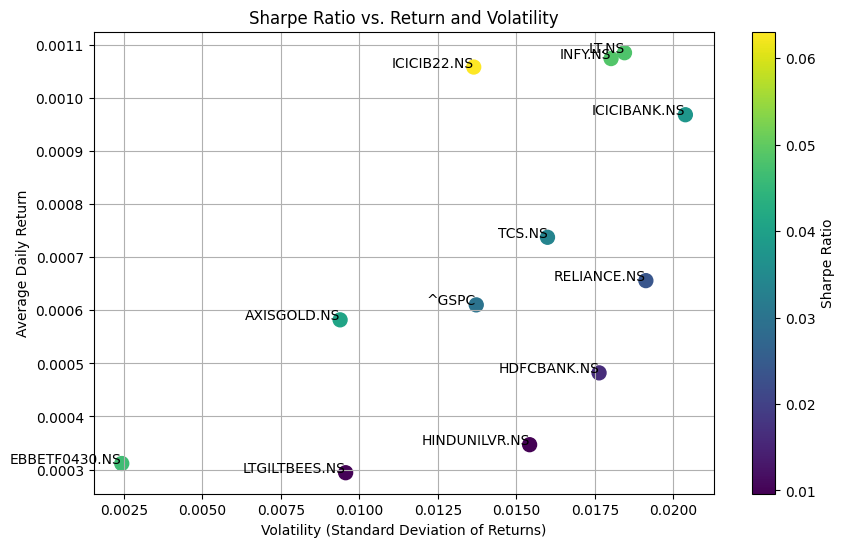

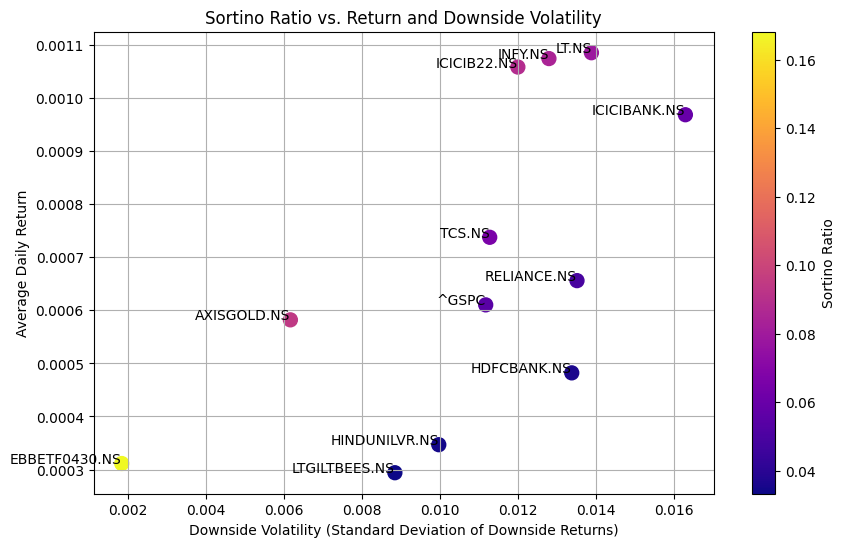

In [3]:
# --- Step 1: Load or Generate Asset Price Data ---
# If you have a CSV file, uncomment and use the line below:
# df = pd.read_csv('your_prices.csv', index_col='Date', parse_dates=True)
# Download adjusted close prices
prices = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)["Adj Close"].dropna()

# --- Step 2: Calculate Daily Returns ---
# Calculate the percentage change from the previous day's price.
returns = prices.pct_change().dropna()

# --- Step 3: Define Parameters ---
# The risk-free rate is typically the return on a low-risk investment, like a government bond.
# We'll use 0 for simplicity.
risk_free_rate = 0.05/252

# The minimum acceptable return for the Sortino Ratio. We'll use 0 here.
min_acceptable_return = 0.0


# --- Step 4: Calculate Ratios for Each Asset ---
results = {}
for asset in returns.columns:
    asset_returns = returns[asset]
    avg_return = asset_returns.mean()
    volatility = asset_returns.std()

    # Calculate Sharpe Ratio
    sharpe_ratio = (avg_return - risk_free_rate) / volatility

    # Calculate Sortino Ratio
    # We only consider returns that are below the minimum acceptable return.
    downside_returns = asset_returns[asset_returns < min_acceptable_return]
    downside_volatility = downside_returns.std()

    # Handle the case where there are no downside returns to avoid division by zero.
    sortino_ratio = (avg_return - min_acceptable_return) / downside_volatility if downside_volatility != 0 else np.nan

    # Store all the calculated values
    results[asset] = {
        'Return': avg_return,
        'Volatility': volatility,
        'Downside Volatility': downside_volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio
    }

# Convert the results dictionary into a DataFrame for a clean summary
results_df = pd.DataFrame(results).T
print("Calculated Ratios and Metrics:")
print(results_df)


# --- Step 5: Plotting the Results ---

# Plot 1: Sharpe Ratio
plt.figure(figsize=(10, 6))
# A scatter plot with volatility on the x-axis and return on the y-axis.
# The color of the points represents the Sharpe Ratio.
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', s=100)
plt.title('Sharpe Ratio vs. Return and Volatility')
plt.xlabel('Volatility (Standard Deviation of Returns)')
plt.ylabel('Average Daily Return')
plt.colorbar(label='Sharpe Ratio')
# Add asset labels to each point
for i, asset in enumerate(results_df.index):
    plt.text(results_df['Volatility'].iloc[i], results_df['Return'].iloc[i], asset, ha='right')
plt.grid(True)
plt.savefig('sharpe_ratio_plot.png')
plt.show()

# Plot 2: Sortino Ratio
plt.figure(figsize=(10, 6))
# A scatter plot with downside volatility on the x-axis and return on the y-axis.
# The color of the points represents the Sortino Ratio.
plt.scatter(results_df['Downside Volatility'], results_df['Return'], c=results_df['Sortino Ratio'], cmap='plasma', s=100)
plt.title('Sortino Ratio vs. Return and Downside Volatility')
plt.xlabel('Downside Volatility (Standard Deviation of Downside Returns)')
plt.ylabel('Average Daily Return')
plt.colorbar(label='Sortino Ratio')
# Add asset labels to each point
for i, asset in enumerate(results_df.index):
    plt.text(results_df['Downside Volatility'].iloc[i], results_df['Return'].iloc[i], asset, ha='right')
plt.grid(True)
plt.savefig('sortino_ratio_plot.png')
plt.show()

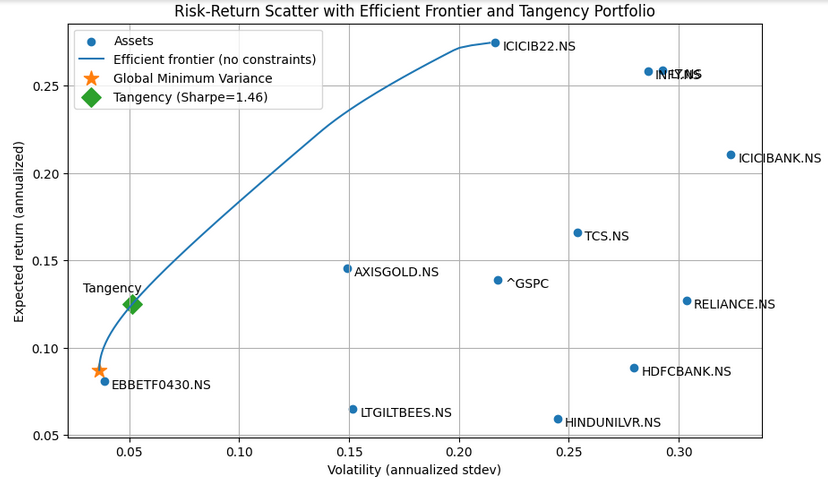

**Tangency portfolio (weights)**:

- EBBETF0430.NS    0.6288
- AXISGOLD.NS      0.1432
- ICICIB22.NS      0.1382
- INFY.NS          0.0422
- LTGILTBEES.NS    0.0284
- ^GSPC            0.0193
- HINDUNILVR.NS    0.0000
- HDFCBANK.NS      0.0000
- LT.NS            0.0000
- ICICIBANK.NS     0.0000
- RELIANCE.NS      0.0000
- TCS.NS           0.0000
dtype: float64

**Tangency performance (ann):**

Return: 0.1250, Volatility: 0.0514, Sharpe: 1.4589

**Global Minimum Variance (weights)**:
- EBBETF0430.NS    0.8536
- AXISGOLD.NS      0.0541
- LTGILTBEES.NS    0.0511
- ^GSPC            0.0262
- ICICIB22.NS      0.0105
- TCS.NS           0.0028
- HINDUNILVR.NS    0.0017
- HDFCBANK.NS      0.0000
- LT.NS            0.0000
- INFY.NS          0.0000
- ICICIBANK.NS     0.0000
- RELIANCE.NS      0.0000
dtype: float64

**Global Minimum Variance (ann)**:

Return: 0.0872, Volatility: 0.0363, Sharpe: 1.0241


# Debt Assets Dominance in GMV and Tangency Portfolios

The **high weighting of debt assets** in both the Tangency and Global Minimum Variance (GMV) portfolios is a direct result of their favorable risk and return characteristics, which align perfectly with the **core objective of each portfolio**:  
- **GMV Portfolio** → minimize total risk  
- **Tangency Portfolio** → maximize the risk-adjusted return (Sharpe Ratio)

---

## Analysis of the Global Minimum Variance (GMV) Portfolio

The **GMV portfolio** is designed with one primary goal:  
➡️ Achieve the lowest possible volatility for the entire portfolio.  

It is constructed to be the **least risky combination of assets** available.

### Key Observations
- Debt assets dominate due to their **very low volatility**.  
- **EBBETF0430.NS**  
  - Volatility: **0.002431** → the lowest among all assets.  
  - Weight in portfolio: **85.36%** → drastically reduces overall volatility.  
- **LTGILTBEES.NS**  
  - Volatility: **0.009561** → also among the lowest.  
  - Acts as an additional risk stabilizer.

✅ By concentrating on **EBBETF0430.NS** and **LTGILTBEES.NS**, the GMV portfolio locks in extremely low risk, fulfilling its **risk-minimization mandate**.

---

## Analysis of the Tangency Portfolio

The **Tangency portfolio** balances risk and return to achieve the **highest possible Sharpe Ratio**.  
➡️ Its aim is to **maximize return per unit of risk**.

### Key Observations
- Debt assets again dominate because of their **high Sharpe Ratios**:  
  - **ICICIB22.NS** → Highest daily Sharpe Ratio: **0.063057**  
  - **EBBETF0430.NS** → Second-highest Sharpe Ratio: **0.046455**  
- Portfolio weights:  
  - **ICICIB22.NS → 13.82%**  
  - **EBBETF0430.NS → 62.88%**  
- Some equities (e.g., **INFY.NS**) show higher daily returns, but their **volatility erodes Sharpe Ratios**, making them less attractive.

✅ The Tangency portfolio **strategically emphasizes high Sharpe debt assets**, while keeping equity allocation limited.

---

## Conclusion

The **dominance of debt assets** in both portfolios is a **logical outcome of the optimization process**, not coincidence.

- **Risk Reduction (GMV Portfolio)**  
  - Debt assets’ **low volatility & downside volatility** perfectly align with the goal of **minimizing total risk**.  

- **Risk-Adjusted Return (Tangency Portfolio)**  
  - Debt assets’ ability to deliver **stable returns with minimal risk** translates into **high Sharpe Ratios**, making them the **cornerstone of risk-adjusted optimization**.  

📌 **Final Insight**:  
Debt instruments form the **core allocation** because they are uniquely capable of serving **both defensive (risk minimization)** and **offensive (Sharpe maximization)** portfolio strategies.


---

## Next Steps: Rationalizing Weight Bounds

Without constraints, optimizers concentrate heavily in the most efficient assets. To improve diversification:

### 1. Minimum & Maximum Weights
- Example: `weight_i ∈ [0.02, 0.20]`  
- Prevents exclusion of diversifying assets and over-concentration.

### 2. Asset Class Bucketing
- Group assets into **Debt, Equity, Gold**.  
- Apply bounds at **category level** to maintain strategic allocation.

---

## Best Practices for Asset Selection

1. **Focus on correlations**: Assets with low/negative correlation improve diversification.  
2. **Expand asset classes**: Add international equities, REITs, commodities.  
3. **Ensure liquidity**: Avoid illiquid instruments that could distort optimization.  

---

✅ By implementing these practices, portfolios become **more resilient**, reducing concentration risk while maximizing **risk-adjusted returns**.